<a href="https://colab.research.google.com/github/SowjanyaKiran/Timeseries_appledataset_sowjanya/blob/main/Time_Series_Forecasting_APPLE_Stock_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [74]:
#Importing the data
df = pd.read_csv('/content/AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [75]:
#Getting an idea about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10409 non-null  object 
 1   Open       10409 non-null  float64
 2   High       10409 non-null  float64
 3   Low        10409 non-null  float64
 4   Close      10409 non-null  float64
 5   Adj Close  10409 non-null  float64
 6   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 569.4+ KB


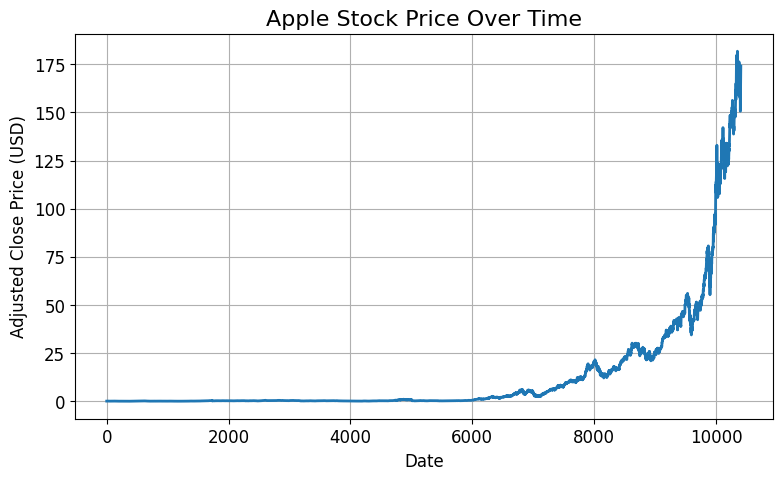

In [80]:
#Plot
df['Adj Close'].plot(figsize=(9,5), linewidth=2, fontsize=12)
plt.title('Apple Stock Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price (USD)', fontsize=12)
plt.grid(True)
plt.show()

In [81]:
# Load your dataset
df = pd.read_csv("AAPL.csv", parse_dates=['Date'])

# Filter data from 2001 onwards
df = df[df['Date'].dt.year > 2000]

# Reset index
df.reset_index(drop=True, inplace=True)

print(df.head())
print(df['Date'].min(), "to", df['Date'].max())

        Date      Open      High       Low     Close  Adj Close     Volume
0 2001-01-02  0.265625  0.272321  0.260045  0.265625   0.227448  452312000
1 2001-01-03  0.258929  0.297991  0.257813  0.292411   0.250384  817073600
2 2001-01-04  0.323940  0.330357  0.300223  0.304688   0.260897  739396000
3 2001-01-05  0.302455  0.310268  0.286830  0.292411   0.250384  412356000
4 2001-01-08  0.302455  0.303292  0.284598  0.295759   0.253251  373699200
2001-01-02 00:00:00 to 2022-03-24 00:00:00


In [82]:
#Performing EDA
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [83]:
#Summarize the Dataset
df.shape

(5341, 7)

In [84]:
#converting "Date" to date time
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,0.265625,0.272321,0.260045,0.265625,0.227448,452312000
2001-01-03,0.258929,0.297991,0.257813,0.292411,0.250384,817073600
2001-01-04,0.323940,0.330357,0.300223,0.304688,0.260897,739396000
2001-01-05,0.302455,0.310268,0.286830,0.292411,0.250384,412356000
2001-01-08,0.302455,0.303292,0.284598,0.295759,0.253251,373699200


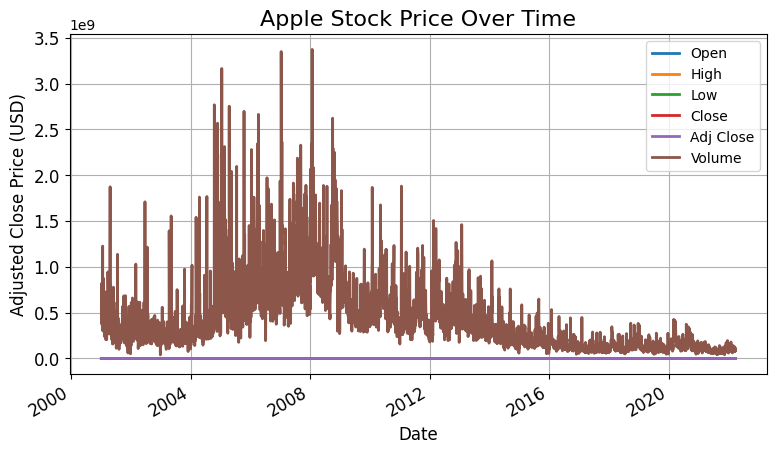

In [85]:
#Plot
df.plot(figsize=(9,5), linewidth=2, fontsize=12)
plt.title('Apple Stock Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price (USD)', fontsize=12)
plt.grid(True)
plt.show()

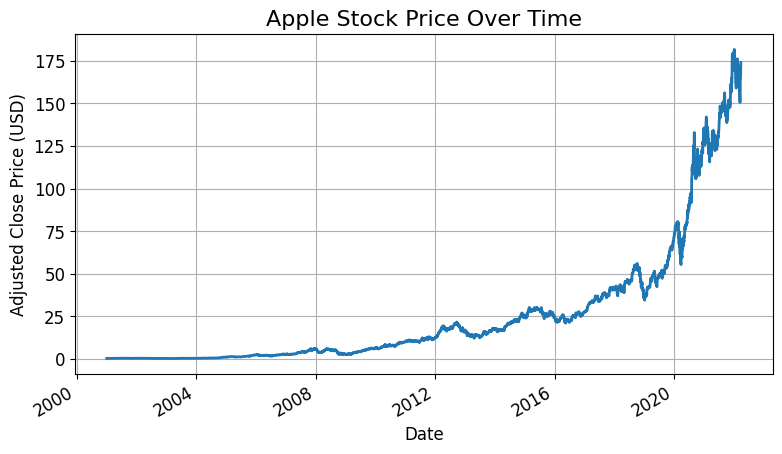

In [86]:
#Plot
df['Adj Close'].plot(figsize=(9,5), linewidth=2, fontsize=12)
plt.title('Apple Stock Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price (USD)', fontsize=12)
plt.grid(True)
plt.show()

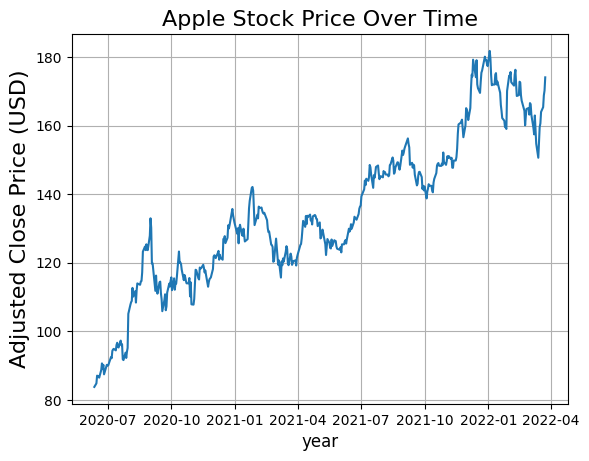

In [47]:
#Plot 2020 - 2022 year
plt.plot(df.index[-450:],df['Adj Close'][-450:])
plt.title('Apple Stock Price Over Time', fontsize=16)
plt.xlabel('year', fontsize=12)
plt.ylabel('Adjusted Close Price (USD)', fontsize =16)
plt.grid(True)
plt.show()

In [48]:
yearly_close = df.groupby(df.index.year)['Adj Close'].mean()

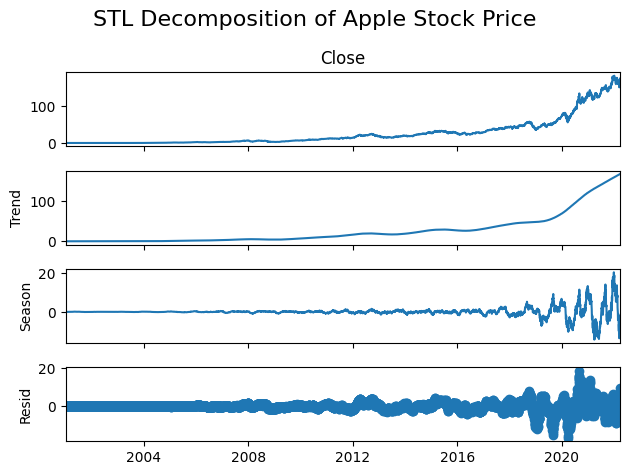

In [49]:
#STL Decompostion
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Use 'Close' or 'Adj Close' for analysis
series = df['Close']

# Apply STL decomposition (choose period based on suspected seasonality)
stl = STL(series, period=252)
result = stl.fit()

# Plot the decomposition
result.plot()
plt.suptitle("STL Decomposition of Apple Stock Price", fontsize=16)
plt.tight_layout()
plt.show()


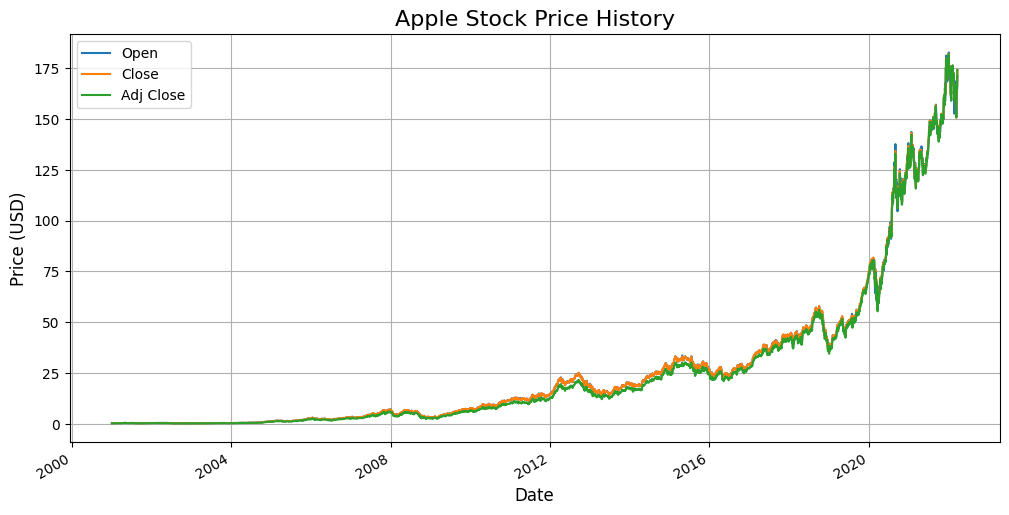

In [50]:
#plot
df[['Open', 'Close', 'Adj Close']].plot(figsize=(12,6), linewidth=1.5)
plt.title('Apple Stock Price History', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True)
plt.show()

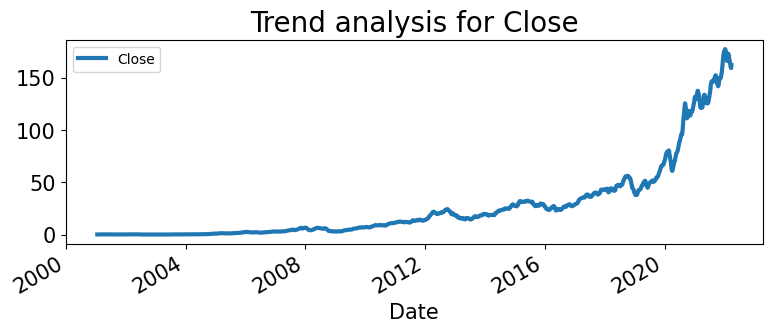

In [51]:
#Check for trend
close = df[['Close']]
close.rolling(12).mean().plot(figsize = (9,3) , linewidth =3 , fontsize =15)
plt.title('Trend analysis for Close' , fontsize =20)
plt.xlabel('Date' , fontsize =15)
plt.show()

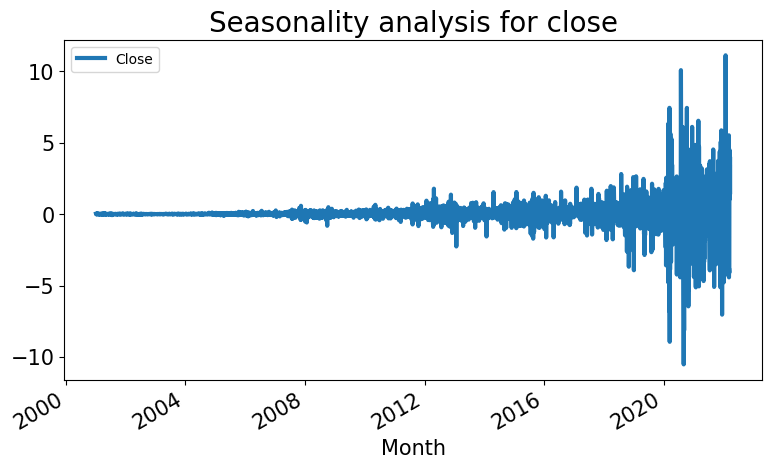

In [52]:
#Check for seasonality
close.diff().plot(figsize =(9, 5) , linewidth =3 , fontsize =15)
plt.title('Seasonality analysis for close' , fontsize =20)
plt.xlabel('Month' , fontsize =15)
plt.show()

In [53]:
#ARIMA for close prediction
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(close , order = (1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5341
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6899.767
Date:                Tue, 29 Jul 2025   AIC                          13805.533
Time:                        05:38:20   BIC                          13825.282
Sample:                             0   HQIC                         13812.432
                               - 5341                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4371      0.087     -5.052      0.000      -0.607      -0.268
ma.L1          0.3980      0.088      4.522      0.000       0.225       0.571
sigma2         0.7759      0.004    205.933      0.0

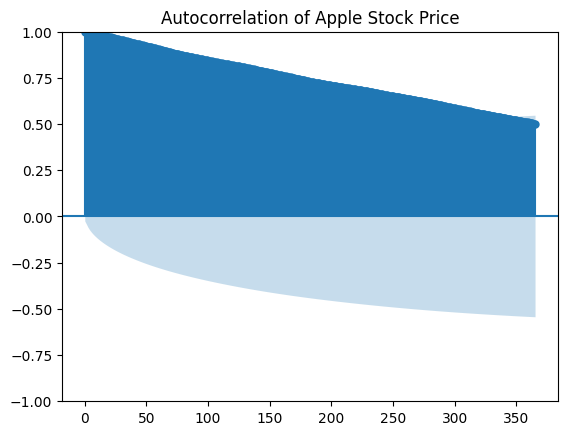

In [54]:
#ACP plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=365, title="Autocorrelation of Apple Stock Price")
plt.show()


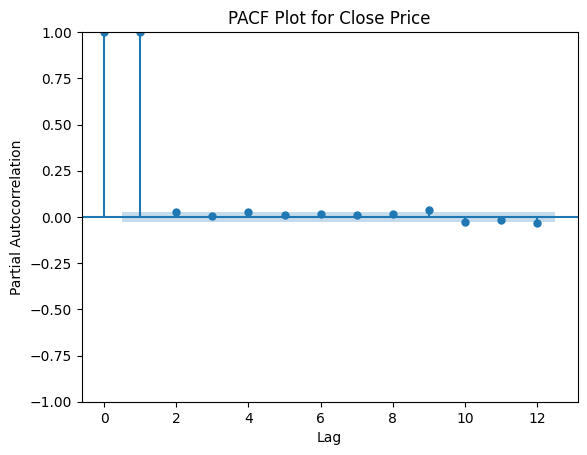

In [55]:
#PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf

# Pass only the 'Close' column as a Series
plot_pacf(close['Close'], lags=12)
plt.title('PACF Plot for Close Price')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


In [56]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
result = adfuller(close['Close'])
print("📉 Augmented Dickey-Fuller Test:")
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] <= 0.05:
    print("Data is stationary — you can use it directly for ARIMA.")
else:
    print("Data is NOT stationary — you should apply differencing.")

📉 Augmented Dickey-Fuller Test:
ADF Statistic: 4.3178207735344145
p-value: 1.0
Data is NOT stationary — you should apply differencing.


In [57]:
#Fitting the ARIMA Model(Basic)
model_arima = ARIMA(close , order = (1,1,1))
model_arima_fit = model_arima.fit()
print('\nARIMA Model Summary:\n')
print(model_arima_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



ARIMA Model Summary:

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5341
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6899.767
Date:                Tue, 29 Jul 2025   AIC                          13805.533
Time:                        05:38:33   BIC                          13825.282
Sample:                             0   HQIC                         13812.432
                               - 5341                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4371      0.087     -5.052      0.000      -0.607      -0.268
ma.L1          0.3980      0.088      4.522      0.000       0.225       0.571
sigma2         0.7759      0.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


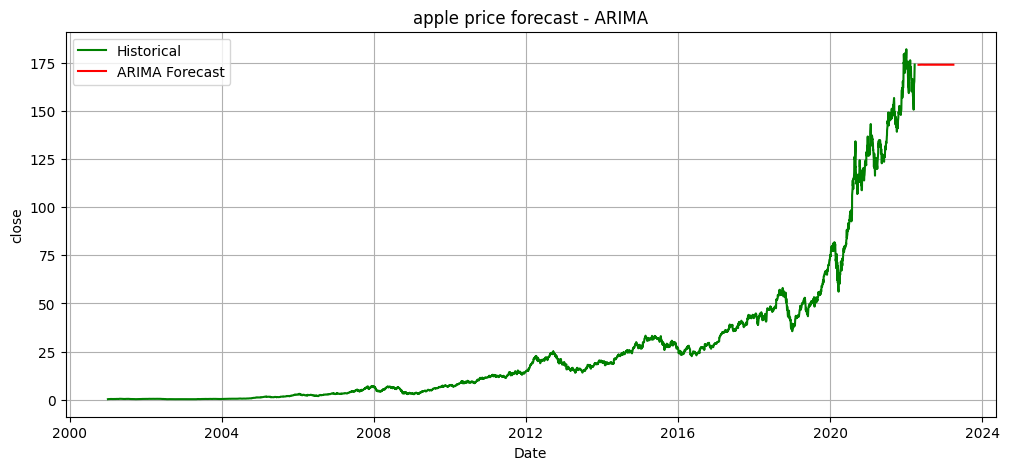

In [58]:
#Forecasting using ARIMA
forecast_arima = model_arima_fit.forecast(steps = 12)
forecast_index = pd.date_range(start = close.index[-1] + pd.DateOffset(months = 1) , periods = 12 , freq = 'M')

#Plot
plt.figure(figsize = (12 , 5) )
plt.plot(close, label = 'Historical' , color = 'green')
plt.plot(forecast_index , forecast_arima , label = 'ARIMA Forecast' , color = 'red')
plt.title('apple price forecast - ARIMA')
plt.xlabel('Date')
plt.ylabel('close')
plt.grid(True)
plt.legend()
plt.show()

In [59]:
#SARIMA for close prediction
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(close , order = (1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5341
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -6899.767
Date:                Tue, 29 Jul 2025   AIC                          13805.533
Time:                        05:38:43   BIC                          13825.282
Sample:                             0   HQIC                         13812.432
                               - 5341                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4371      0.087     -5.052      0.000      -0.607      -0.268
ma.L1          0.3980      0.088      4.522      0.000       0.225       0.571
sigma2         0.7759      0.004    205.933      0.0

In [60]:
#Fitting the SARIMA Model(Basic)
model_sarimax = SARIMAX(close, order = (1,1,1) , seasonal_order = (1,1,1,10))
model_sarimax_fit = model_sarimax.fit()
print('\nSARIMA Model Summary:\n')
print(model_sarimax_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



SARIMA Model Summary:

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 5341
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 10)   Log Likelihood               -6912.623
Date:                            Tue, 29 Jul 2025   AIC                          13835.246
Time:                                    05:38:54   BIC                          13868.152
Sample:                                         0   HQIC                         13846.742
                                           - 5341                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4238      0.091     -4.635      0.000      -0.603      -0.245
ma.L1      

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


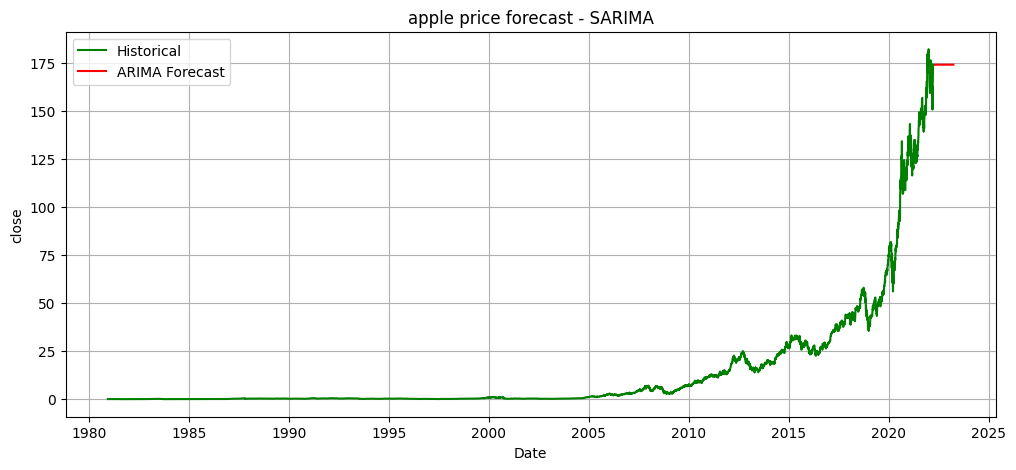

In [32]:
#Forecasting using SARIMA
forecast_sarima = model_sarimax_fit.forecast(steps = 12)
forecast_index = pd.date_range(start = close.index[-1] + pd.DateOffset(months = 1) , periods = 12 , freq = 'M')

#Plot
plt.figure(figsize = (12 , 5) )
plt.plot(close, label = 'Historical' , color = 'green')
plt.plot(forecast_index , forecast_arima , label = 'ARIMA Forecast' , color = 'red')
plt.title('apple price forecast - SARIMA')
plt.xlabel('Date')
plt.ylabel('close')
plt.grid(True)
plt.legend()
plt.show()

In [33]:
#Model comparison
print('Model comparison:')
print(f"ARIMA Model AIC : {model_arima_fit.aic}")
print(f"SARIMA Model AIC : {model_sarimax_fit.aic}")

#Select model based on lesser AIC
if model_arima_fit.aic < model_sarimax_fit.aic:
    print('\nARIMA Model is selected')
else:
    print('\nSARIMA Model is selected')

Model comparison:
ARIMA Model AIC : 19959.046234628026
SARIMA Model AIC : 19991.956866721834

ARIMA Model is selected


In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluation Metrics
forecast_steps = 30
actual = close['Close'][-forecast_steps:]

# Predict values from the model (retrain if needed for 30 steps)
model = ARIMA(close['Close'][:-forecast_steps], order=(1,1,1))
model_fit = model.fit()
predicted = model_fit.forecast(steps=forecast_steps)

# Ensure index aligns
predicted.index = actual.index

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

# Results
print(f"✅ Forecast Evaluation (ARIMA):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


✅ Forecast Evaluation (ARIMA):
RMSE: 13.2506
MAE:  11.9791
MAPE: 7.42%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [35]:
# Results
print(f"✅ Forecast Evaluation (ARIMA):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

✅ Forecast Evaluation (ARIMA):
RMSE: 13.2506
MAE:  11.9791
MAPE: 7.42%


In [37]:
# Evaluation Metrics
forecast_steps = 30
train_data = close['Close'][:-forecast_steps]
test_data = close['Close'][-forecast_steps:]
model_sarimax = SARIMAX(train_data, order=(1,1,1), seasonal_order=(1,1,1,12))
model_sarimax_fit = model_sarimax.fit()

# Forecast
forecast_sarima = model_sarimax_fit.forecast(steps=forecast_steps)

# Align forecast index to test data
forecast_sarima.index = test_data.index
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate metrics
rmse = np.sqrt(mean_squared_error(test_data, forecast_sarima))
mae = mean_absolute_error(test_data, forecast_sarima)
mape = np.mean(np.abs((test_data - forecast_sarima) / test_data)) * 100

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [38]:
# Print results
print("✅ Forecast Evaluation (SARIMA):")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"MAPE : {mape:.2f}%")

✅ Forecast Evaluation (SARIMA):
RMSE : 15.1082
MAE  : 13.8367
MAPE : 8.56%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


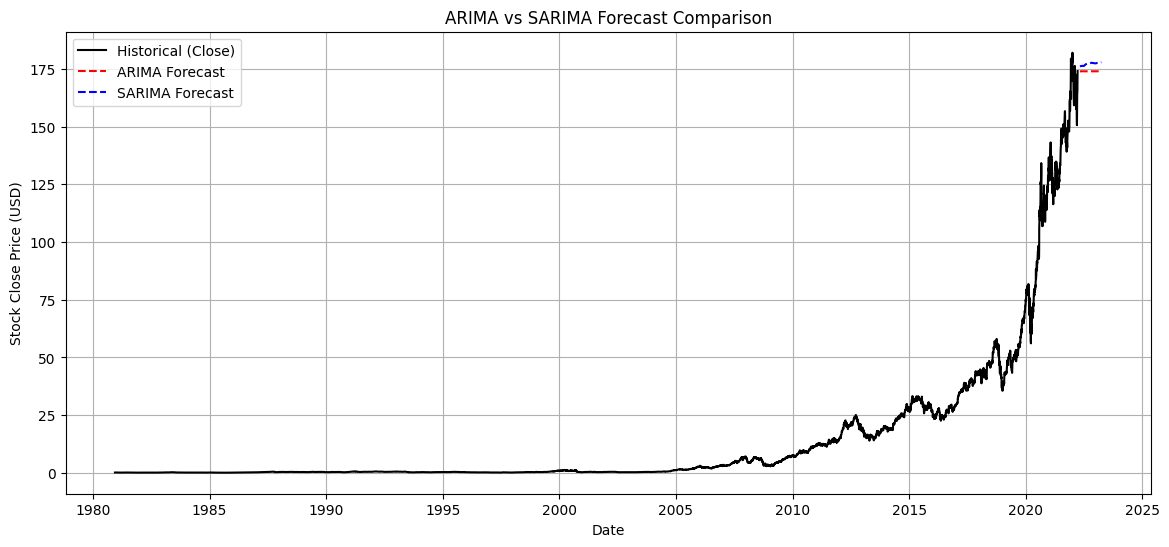

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Generate forecast index for next 12 months
forecast_index = pd.date_range(start=close.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Forecast using ARIMA
forecast_arima = model_arima_fit.forecast(steps=12)

# Forecast using SARIMA
forecast_sarima = model_sarimax_fit.forecast(steps=12)

# Plot Historical Data + Both Forecasts
plt.figure(figsize=(14, 6))
plt.plot(close, label='Historical (Close)', color='black')
plt.plot(forecast_index, forecast_arima, label='ARIMA Forecast', color='red', linestyle='--')
plt.plot(forecast_index, forecast_sarima, label='SARIMA Forecast', color='blue', linestyle='--')
plt.title('ARIMA vs SARIMA Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Stock Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


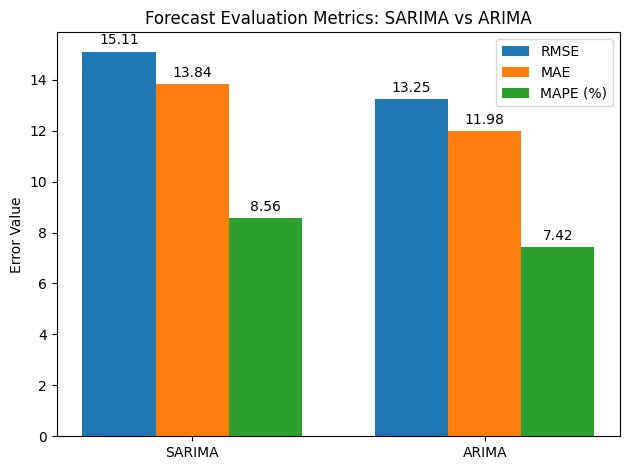

In [40]:
# Plot Forecast Evaluation Metrics: SARIMA vs ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Updated metrics
models = ['SARIMA', 'ARIMA']
rmse = [15.1082, 13.2506]
mae = [13.8367, 11.9791]
mape = [8.56, 7.42]

x = np.arange(len(models))
width = 0.25

# Plotting
fig, ax = plt.subplots()
bars1 = ax.bar(x - width, rmse, width, label='RMSE')
bars2 = ax.bar(x, mae, width, label='MAE')
bars3 = ax.bar(x + width, mape, width, label='MAPE (%)')

# Labels and title
ax.set_ylabel('Error Value')
ax.set_title('Forecast Evaluation Metrics: SARIMA vs ARIMA')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Annotate bars with values
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()